# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [50]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split as tts

## Regression Model Evaluation

In [86]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()


In [87]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [88]:
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=data['target_names'])

data = pd.concat([X, y], axis=1)

In [89]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [90]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, random_state=42)

In [91]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512, 1), (4128, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [92]:
from sklearn.linear_model import LinearRegression as LinReg 

linreg = LinReg()

linreg.fit(X_train, y_train)

y_pred_test = linreg.predict(X_test)

y_pred_train = linreg.predict(X_train)


## 3. Calculate and print R-squared for both the training and the testing set.

In [93]:
from sklearn.metrics import r2_score as r2

R2_train = r2(y_train, y_pred_train)
R2_test = r2(y_test, y_pred_test)

print(R2_test, R2_train)

0.5757877060324508 0.6125511913966952


## 4. Calculate and print mean squared error for both the training and the testing set.

In [94]:
from sklearn.metrics import mean_squared_error as mse

MSE_test = mse(y_test, y_pred_test)
MSE_train = mse(y_train, y_pred_train)

print(MSE_test, MSE_train)

0.5558915986952444 0.5179331255246699


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [95]:
from sklearn.metrics import mean_absolute_error as mae


MAE_test = mae(y_test, y_pred_test)
MAE_train = mae(y_train, y_pred_train)

print(MAE_test, MAE_train)

0.5332001304956553 0.5286283596581922


## Classification Model Evaluation

In [126]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [127]:
y = data['class']

In [128]:
y.shape

(150,)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [129]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [130]:
from sklearn.linear_model import LogisticRegression 

logR = LogisticRegression(max_iter=2000)

logR.fit(X_train, y_train)

y_pred_test = logR.predict(X_test)

y_pred_train = logR.predict(X_train)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [131]:
from sklearn.metrics import accuracy_score as acc

score_test = acc(y_test, y_pred_test)
score_train = acc(y_train, y_pred_train)

print('Test Accuracy Score', score_test)
print('Train Accuracy Score', score_train)

Test Accuracy Score 0.9666666666666667
Train Accuracy Score 0.9833333333333333


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [134]:
from sklearn.metrics import balanced_accuracy_score as bas

balance_score_test = bas(y_test, y_pred_test)
balance_score_train = bas(y_train, y_pred_train)

print('Test Balance Accuracy Score', balance_score_test)
print('Train Balance Accuracy Score', balance_score_train)

Test Balance Accuracy Score 0.9696969696969697
Train Balance Accuracy Score 0.982905982905983


## 10. Calculate and print the precision score for both the training and the testing set.

In [142]:
from sklearn.metrics import precision_score as ps

precision_score_test = ps(y_test, y_pred_test, average = 'micro')
precision_score_train = ps(y_train, y_pred_train, average = 'micro')

print('Test Precision Accuracy Score', precision_score_test)
print('Train Precision Accuracy Score', precision_score_train)

Test Precision Accuracy Score 0.9666666666666667
Train Precision Accuracy Score 0.9833333333333333


## 11. Calculate and print the recall score for both the training and the testing set.

In [143]:
from sklearn.metrics import recall_score as rs

recall_score_test = rs(y_test, y_pred_test, average = 'micro')
recall_score_train = rs(y_train, y_pred_train, average = 'micro')

print('Test Recall Accuracy Score', recall_score_test)
print('Train Recall Accuracy Score', recall_score_train)

Test Recall Accuracy Score 0.9666666666666667
Train Recall Accuracy Score 0.9833333333333333


## 12. Calculate and print the F1 score for both the training and the testing set.

In [145]:
from sklearn.metrics import f1_score as F1 

f1_score_test = F1(y_test, y_pred_test, average = 'micro')
f1_score_train = F1(y_train, y_pred_train, average = 'micro')

print('Test F1 Accuracy Score', f1_score_test)
print('Train F1 Accuracy Score', f1_score_train)

Test F1 Accuracy Score 0.9666666666666667
Train F1 Accuracy Score 0.9833333333333333


## 13. Generate confusion matrices for both the training and the testing set.

In [149]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [150]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

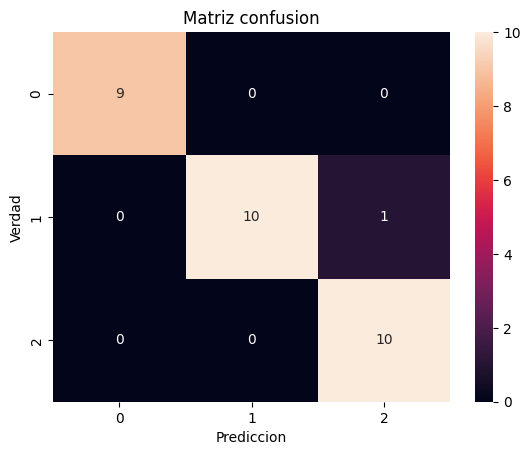

In [156]:
from sklearn.metrics import confusion_matrix

confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

sns.heatmap(confusion_matrix_test, annot=True)
plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

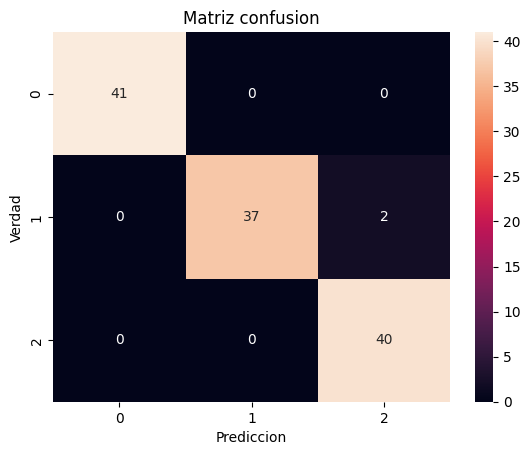

In [155]:
confusion_matrix_test = confusion_matrix(y_train, y_pred_train)

sns.heatmap(confusion_matrix_test, annot=True)
plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.